# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this assignment we will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of our analysis, we will provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem. 

### Business Understanding to Data Problem Definition
**Business Problem:** Identifying key drivers for used car prices to guide inventory decisions for a used car dealership.

**Data Problem Definition:** The task is to develop a predictive model that can accurately determine the price of used cars based on their attributes. This involves analyzing historical data to identify which features (like make, model, year, mileage, condition) most significantly impact the selling price. The model needs to be robust, interpretable, and capable of handling large-scale data to provide actionable insights for strategic decision-making.

#### Lets start with loading the data

In [10]:
import pandas as pd

# Load the dataset to take a look at the first few rows and understand its structure
data_path = 'data/vehicles.csv'
vehicles_df = pd.read_csv(data_path)
vehicles_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


It looks like the dataset contains several columns relevant to our analysis of used car prices, but many of the first few entries are missing a significant amount of data. The columns include:

- id: A unique identifier for the car.
- region: The region in which the car is being sold.
- price: The selling price of the car (our target variable).
- year: The year the car was manufactured.
- manufacturer: The make of the car.
- model: The model of the car.
- condition: The condition of the car (like new, used, etc.).
- cylinders: The number of cylinders in the car’s engine.
- fuel: The type of fuel the car uses.
- odometer: The mileage of the car.
- title_status: The legal status of the car (clean, salvage, etc.).
- transmission: The type of transmission (automatic, manual).
- VIN: The Vehicle Identification Number.
- drive: The type of drive (FWD, RWD, AWD).
- size: The size category of the car.
- type: The body type of the car.
- paint_color: The color of the car.
- state: The state in which the car is being sold.

### Data Understanding
**Lets first study the missing values.**

In [11]:
# Calculate the percentage of missing values for each column
missing_data = vehicles_df.isnull().sum()
total_entries = len(vehicles_df)
missing_percentage = (missing_data / total_entries) * 100

# Creating a DataFrame to display the percentage of missing values for each column
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage Missing': missing_percentage.values
}).sort_values(by='Percentage Missing', ascending=False)

missing_df.reset_index(drop=True, inplace=True)
missing_df

,Column,Missing Values,Percentage Missing
0,size,306325,71.766776
1,cylinders,177647,41.619693
2,condition,174074,40.782599
3,VIN,161001,37.719816
4,drive,130536,30.582381
5,paint_color,130169,30.496399
6,type,92826,21.747565
7,manufacturer,17639,4.132520
8,title_status,8242,1.930961
9,model,5261,1.232563


#### Vehicle prices vary significantly by **type**, making it practical to develop a separate model for each type.

### Data Preparation
Lets prepare the data for modeling. 
- Drop unwanted columns
- handle missing values
- handle junk data
- Encoding Categorical Variables
- Data scaling

Drop rows missing value in type column

In [12]:
# Display the number of missing values in 'type' before dropping
print("Missing 'type' values before:", vehicles_df['type'].isnull().sum())

# Drop rows where 'type' is missing
vehicles_df = vehicles_df.dropna(subset=['type'])

# Confirm the removal of missing 'type' rows
print("Missing 'type' values after:", vehicles_df['type'].isnull().sum())


Missing 'type' values before: 92826
Missing 'type' values after: 0


In [13]:
# Display the first few rows of the dataset to check the current structure
vehicles_df.head()

# Check the distribution of vehicle types
print(vehicles_df['type'].value_counts())

type
sedan          87053
SUV            77279
pickup         43506
truck          35279
other          22110
coupe          19203
hatchback      16598
wagon          10751
van             8548
convertible     7730
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64


- Majority of values of **Size** is missing so dropping it.
- Dropping **VIN** as it should not have any impact on prices. 
- Dropping **Cylendar** as well because of high number of missing values.
- Putting **Unknown** on rest of missing values.

In [14]:
# Drop 'size', 'VIN', and 'cylinders' columns from the dataset
vehicles_df.drop(['size', 'VIN', 'cylinders'], axis=1, inplace=True)

# Confirm the columns have been removed
print("Columns remaining:", vehicles_df.columns)


Columns remaining: Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')


**dropping ID**

In [15]:
# Drop the 'id' column from the dataset
vehicles_df.drop('id', axis=1, inplace=True)

# Confirm the column has been removed
print("Columns remaining:", vehicles_df.columns)

Columns remaining: Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')


dropping **region** and **model** to reduce number of features.

In [16]:
# Drop 'region' and 'model' columns from the dataset
vehicles_df.drop(['region', 'model'], axis=1, inplace=True)

# Confirm the columns have been removed
print("Columns remaining:", vehicles_df.columns)

Columns remaining: Index(['price', 'year', 'manufacturer', 'condition', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')


Vehicles older than 2000 can be considered **antique**. Such vehicles are priced very differently and should be considered through **separate model** .

In [17]:

# Further filter to only include cars from the year 2000 onwards
vehicles_df = vehicles_df[vehicles_df['year'] >= 2000]

# Check the updated DataFrame
print(vehicles_df.describe())

              price           year      odometer
count  2.899200e+05  289920.000000  2.881560e+05
mean   3.392409e+04    2013.219847  8.810532e+04
std    6.944993e+06       4.959007  9.969050e+04
min    1.010000e+02    2000.000000  0.000000e+00
25%    8.800000e+03    2010.000000  3.400000e+04
50%    1.699900e+04    2014.000000  7.951400e+04
75%    2.899000e+04    2017.000000  1.279128e+05
max    3.736929e+09    2022.000000  1.000000e+07


In [18]:
vehicles_df.head()
print(f"Min Price: {vehicles_df['price'].min()}, Max Price: {vehicles_df['price'].max()}")
print(f"Min Year: {vehicles_df['year'].min()}, Max Year: {vehicles_df['year'].max()}")

Min Price: 101, Max Price: 3736928711
Min Year: 2000.0, Max Year: 2022.0


Seems like there are lot of outliers in price and lot of junk data. Only considering vehicles with price range between 100 and 500000

In [19]:
# Filter the DataFrame to only include rows where the price is between $100 and $500,000
vehicles_df = vehicles_df[(vehicles_df['price'] >= 100) & (vehicles_df['price'] <= 500000)]

# Verify the filtering
print(f"Price Min Value: {vehicles_df['price'].min()}, Price Max Value: {vehicles_df['price'].max()}")


Price Min Value: 101, Price Max Value: 449500


count    289910.000000
mean      20301.057159
std       15128.985300
min         101.000000
25%        8800.000000
50%       16999.000000
75%       28990.000000
max      449500.000000
Name: price, dtype: float64


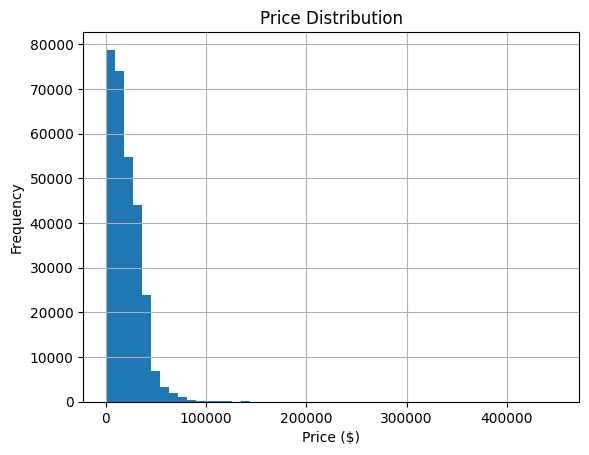

In [20]:
# Check the updated statistics for 'price'
print(vehicles_df['price'].describe())

# Plot a histogram to visually inspect the 'price' distribution
import matplotlib.pyplot as plt
vehicles_df['price'].hist(bins=50)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

Instead of year lets create column as **car_age**

In [21]:
import pandas as pd
from datetime import datetime

#using the datetime module to automatically fetch current year
current_year = datetime.now().year

# Create the 'car_age' column by subtracting the 'year' from the current year
vehicles_df['car_age'] = current_year - vehicles_df['year']

# Now we can drop the original 'year' column as it's no longer needed
vehicles_df.drop('year', axis=1, inplace=True)

# Confirm the transformation
print(vehicles_df[['car_age']].head())

    car_age
27     11.0
28     15.0
29      5.0
30      8.0
31     12.0


In [22]:
# Check for any negative values in 'car_age' which might indicate data errors
negative_age_count = (vehicles_df['car_age'] < 0).sum()
print(f"Number of entries with negative car age: {negative_age_count}")

# handle negative ages by setting them to a default value or removing those rows
if negative_age_count > 0:
    vehicles_df = vehicles_df[vehicles_df['car_age'] >= 0]

Number of entries with negative car age: 0


Cleanup junk data in **odometer**. Only consider rows with odometer in range of **0 to 300000**

In [23]:
# Remove rows where 'odometer' is zero
vehicles_df = vehicles_df[vehicles_df['odometer'] > 0]

# Further filter to include only rows where 'odometer' is less than 300,000 miles
vehicles_df = vehicles_df[vehicles_df['odometer'] < 300000]

# Verify the filtering
print(f"Odometer Min Value: {vehicles_df['odometer'].min()}, Odometer Max Value: {vehicles_df['odometer'].max()}")


Odometer Min Value: 1.0, Odometer Max Value: 299999.0


count    286367.000000
mean      85982.106845
std       59558.238100
min           1.000000
25%       34070.500000
50%       79393.000000
75%      127151.000000
max      299999.000000
Name: odometer, dtype: float64


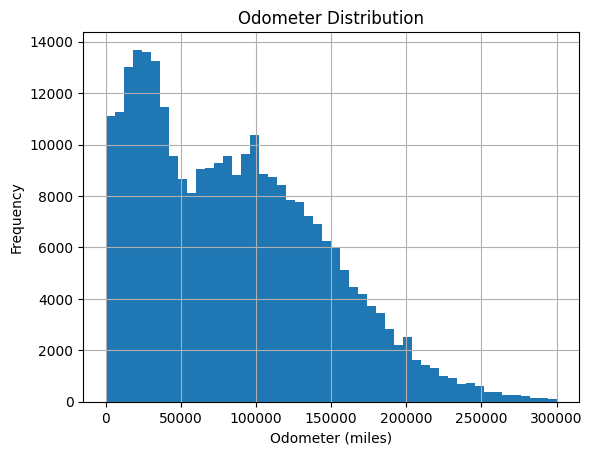

In [24]:
# Check the updated statistics for 'odometer'
print(vehicles_df['odometer'].describe())

# Plot a histogram to visually inspect the 'odometer' distribution
import matplotlib.pyplot as plt
vehicles_df['odometer'].hist(bins=50)
plt.title('Odometer Distribution')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.show()


In [61]:
# Display a summary to check the final structure and any remaining missing values
print(vehicles_df.describe())
print(vehicles_df.isnull().sum())

              price      odometer        car_age
count  3.340080e+05  3.305620e+05  332994.000000
mean   3.010063e+04  9.077527e+04      13.025142
std    6.470427e+06  1.718885e+05       8.546874
min    0.000000e+00  0.000000e+00       3.000000
25%    6.500000e+03  3.443825e+04       8.000000
50%    1.499900e+04  7.949850e+04      11.000000
75%    2.759000e+04  1.273810e+05      16.000000
max    3.736929e+09  1.000000e+07     125.000000
price                0
manufacturer     11158
condition       114018
fuel              1841
odometer          3446
title_status      7104
transmission      1856
drive            69733
type                 0
paint_color      64194
state                0
car_age           1014
dtype: int64


categorizing odometer and removing unavailable values. 

drop **paint** as too many missing values color should not have too much impact on price. 

In [26]:
# Drop the 'paint_color' column from the dataset
vehicles_df.drop('paint_color', axis=1, inplace=True)

# Confirm the column has been removed
print("Columns remaining:", vehicles_df.columns)

Columns remaining: Index(['price', 'manufacturer', 'condition', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'state', 'car_age'],
      dtype='object')


**Correlation analysis**

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

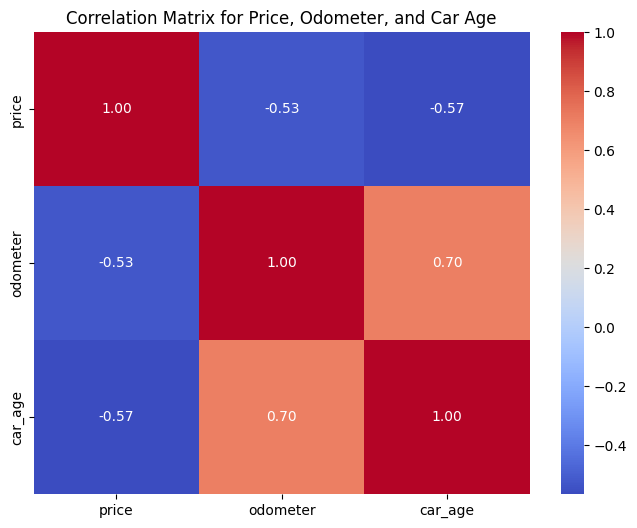

In [34]:
# Calculating correlation of price with numerical features
correlation_matrix = vehicles_df[['price', 'odometer', 'car_age']].corr()
# Plotting the correlation matrix again using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Price, Odometer, and Car Age')
plt.show()

Here's the correlation matrix for the price, odometer, and car age. The key insights from the matrix are:

- **Price and Odometer:** There's a negative correlation (-0.42), suggesting that higher mileage (odometer reading) is associated with lower prices, which aligns with expectations.
- **Price and Car Age:** The negative correlation (-0.41) indicates that older cars tend to be priced lower, another intuitive finding.
These insights suggest that both odometer readings and car age are significant factors in determining used car prices.

handling NAN. Putting **Unknown** for missing values

In [35]:
for col in vehicles_df.columns:
    if vehicles_df[col].dtype == 'object':  # Assuming object types are categorical
        vehicles_df[col].fillna('Unknown', inplace=True)
    elif pd.api.types.is_categorical_dtype(vehicles_df[col]):
        if 'Unknown' not in vehicles_df[col].cat.categories:
            vehicles_df[col] = vehicles_df[col].cat.add_categories('Unknown')
        vehicles_df[col].fillna('Unknown', inplace=True)


C:\Users\himan\AppData\Local\Temp\ipykernel_23680\507173791.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(vehicles_df[col]):
C:\Users\himan\AppData\Local\Temp\ipykernel_23680\507173791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_df[col].fillna('Unknown', inplace=True)


In [36]:
print(vehicles_df.isnull().sum())

price           0
manufacturer    0
condition       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
state           0
car_age         0
dtype: int64


In [37]:
# Drop rows where 'car_age' is missing
vehicles_df.dropna(subset=['car_age'], inplace=True)

# Confirm the drop
print(f"Remaining missing values in 'car_age': {vehicles_df['car_age'].isnull().sum()}")

Remaining missing values in 'car_age': 0


##### **Encoding Categorical Variables**
Many machine learning models require all input data to be numeric. Encoding categorical variables is essential to convert them into a format that can be provided to machine learning algorithms.

**Method: One-Hot Encoding**
One-Hot Encoding creates a binary column for each category and is suitable for nominal categorical data where no ordinal relationship exists.

In [45]:
# Use pandas.get_dummies to apply one-hot encoding
vehicles_df_encoded = pd.get_dummies(vehicles_df, drop_first=True)  # drop_first=True to avoid multicollinearity

# Display the first few rows to confirm encoding
print(vehicles_df_encoded.head())


       price  odometer   car_age  manufacturer_acura  manufacturer_alfa-romeo  \
27  0.875995 -0.471121 -0.152392               False                    False   
28  0.147799 -0.247709  0.656654               False                    False   
29  1.273192 -1.121964 -1.365962               False                    False   
30  0.703876 -0.753182 -0.759177               False                    False   
31 -0.354656  0.705494  0.049869               False                    False   

    manufacturer_aston-martin  manufacturer_audi  manufacturer_bmw  \
27                      False              False             False   
28                      False              False             False   
29                      False              False             False   
30                      False              False             False   
31                      False              False             False   

    manufacturer_buick  manufacturer_cadillac  ...  state_sd  state_tn  \
27               F

Data Normalization or Scaling
Scaling numerical data, especially when the data spans several orders of magnitude, can improve the performance of many algorithms.

Scaling Methods:
Standard Scaling (Z-score scaling): This scales the features based on the standard deviation and mean. It’s effective when data follows a normal distribution.
Min-Max Scaling: Scales the data to a fixed range, usually 0 to 1, which is useful when you need a bounded range.
Given the context of your data (e.g., car_age, odometer_category), you might consider using Min-Max Scaling as it preserves the relationship between values but transforms them into a scale that enhances model training.

#### standard scallar **(Used)**

In [46]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['price', 'odometer', 'car_age']  # Add or remove columns based on your dataset

# Apply scaling on the numerical columns
vehicles_df_encoded[numerical_cols] = scaler.fit_transform(vehicles_df[numerical_cols])

# Check the scaled features
print(vehicles_df[numerical_cols].head())

       price  odometer   car_age
27  0.875995 -0.471121 -0.152392
28  0.147799 -0.247709  0.656654
29  1.273192 -1.121964 -1.365962
30  0.703876 -0.753182 -0.759177
31 -0.354656  0.705494  0.049869


**min max scallar (Not Used)**

In [71]:
#from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
#scaler = MinMaxScaler()
# Apply MinMaxScaler to 'car_age' and any other numerical columns
#numerical_cols = ['car_age']  # Add other numeric columns as needed, e.g., derived columns from encoding

# Scale these columns
#vehicles_df_encoded[numerical_cols] = scaler.fit_transform(vehicles_df_encoded[numerical_cols])
# Display the scaled columns to verify changes
#print(vehicles_df_encoded[numerical_cols].head())

     car_age
27  0.065574
28  0.098361
29  0.016393
30  0.040984
31  0.073770


### **Modeling**

**Liner Regression** and **Ridge regression** 
- split data
- training
- comparing performance using **RSME**

In [48]:
# Exclude 'type' from encoding
vehicles_df_encoded = pd.get_dummies(vehicles_df.drop('type', axis=1))

# Add 'type' column back to the encoded DataFrame
vehicles_df_encoded['type'] = vehicles_df['type']

# Now check the columns to ensure 'type' is correctly included
print(vehicles_df_encoded.columns)


Index(['price', 'odometer', 'car_age', 'manufacturer_Unknown',
       'manufacturer_acura', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick',
       ...
       'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt', 'state_wa',
       'state_wi', 'state_wv', 'state_wy', 'type'],
      dtype='object', length=124)


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np


type_groups = vehicles_df_encoded.groupby('type')

model_performance = {}

# Loop through each vehicle type
for vehicle_type, group in type_groups:
    print(f"\nProcessing vehicle type: {vehicle_type}")
    
    # Prepare features and target variable
    X = group.drop(['price', 'type'], axis=1)  
    y = group['price']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    linear_model = LinearRegression()
    ridge_model = Ridge(alpha=1.0)  # Start with default alpha, tune if necessary

    # Train Linear Regression
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

    # Train Ridge Regression
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

    # Store results
    model_performance[vehicle_type] = {
        'Linear Regression RMSE': rmse_linear,
        'Ridge Regression RMSE': rmse_ridge
    }

    # Print the RMSE for both models
    print(f"Linear Regression RMSE for {vehicle_type}: {rmse_linear}")
    print(f"Ridge Regression RMSE for {vehicle_type}: {rmse_ridge}")



Processing vehicle type: SUV
Linear Regression RMSE for SUV: 0.5746624658560785
Ridge Regression RMSE for SUV: 0.5746824120098663

Processing vehicle type: bus
Linear Regression RMSE for bus: 0.529491585914837
Ridge Regression RMSE for bus: 0.5358004250236275

Processing vehicle type: convertible
Linear Regression RMSE for convertible: 0.903080456474898
Ridge Regression RMSE for convertible: 0.9039494222310551

Processing vehicle type: coupe
Linear Regression RMSE for coupe: 0.9730729855032855
Ridge Regression RMSE for coupe: 0.9694158916768129

Processing vehicle type: hatchback
Linear Regression RMSE for hatchback: 0.2723629340078589
Ridge Regression RMSE for hatchback: 0.2726852706375321

Processing vehicle type: mini-van
Linear Regression RMSE for mini-van: 0.2790423738230739
Ridge Regression RMSE for mini-van: 0.27863429251176924

Processing vehicle type: offroad
Linear Regression RMSE for offroad: 0.47416289410600426
Ridge Regression RMSE for offroad: 0.4672887857467503

Process

Performance of both are very close with slight edge to **Ridge.**

#### Hyperparameter tuning for Ridge

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Setup GridSearchCV to find the best alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}  

best_models = {}

for vehicle_type, group in vehicles_df_encoded.groupby('type'):
    print(f"\nProcessing vehicle type: {vehicle_type}")
    X = group.drop(['price', 'type'], axis=1)
    y = group['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=0)
    grid_search.fit(X_train, y_train)
    
    best_alpha = grid_search.best_params_['alpha']
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    best_models[vehicle_type] = {
        'Best Alpha': best_alpha,
        'RMSE': rmse,
        'Model': best_model
    }
    
    print(f"Best Alpha for {vehicle_type}: {best_alpha}")
    print(f"RMSE for {vehicle_type}: {rmse}")



Processing vehicle type: SUV
Best Alpha for SUV: 1
RMSE for SUV: 0.5746824120098663

Processing vehicle type: bus
Best Alpha for bus: 1
RMSE for bus: 0.5358004250236275

Processing vehicle type: convertible
Best Alpha for convertible: 0.1
RMSE for convertible: 0.9030964711892193

Processing vehicle type: coupe
Best Alpha for coupe: 1
RMSE for coupe: 0.9694158916768129

Processing vehicle type: hatchback
Best Alpha for hatchback: 1
RMSE for hatchback: 0.2726852706375321

Processing vehicle type: mini-van
Best Alpha for mini-van: 1
RMSE for mini-van: 0.27863429251176924

Processing vehicle type: offroad
Best Alpha for offroad: 10
RMSE for offroad: 0.49656392607789296

Processing vehicle type: other
Best Alpha for other: 1
RMSE for other: 0.7050789882512534

Processing vehicle type: pickup
Best Alpha for pickup: 10
RMSE for pickup: 0.5686212851591713

Processing vehicle type: sedan
Best Alpha for sedan: 1
RMSE for sedan: 0.3938293659394805

Processing vehicle type: truck
Best Alpha for t

### Evaluation

**Lets evaluate our model's finding.**

#### **Evaluating Alpha and RMSE**

**General Observations**
- **Optimal Alpha Variability:**
  - For most vehicle types, an alpha of 1 seems to provide the best balance between bias and variance, minimizing the RMSE.
  - Vehicle types like 'convertible', 'offroad', 'pickup', 'truck', and 'wagon' benefit from other alpha values, indicating different levels of  sensitivity to model complexity and regularization strength. For example:
    - **Lower Alphas (0.1):** Better for 'convertible' and 'wagon', suggesting minimal regularization beyond the basic is needed.
    - **Higher Alphas (10):** Better for 'offroad', 'pickup', and 'truck', suggesting these types might have data that are more prone to overfitting or have more complex underlying patterns that require stronger regularization.
- **Performance Metrics (RMSE):**
  - The RMSE values vary significantly across vehicle types, reflecting the diversity in data distribution, volume, and inherent noise within each category.
  - Lower RMSE values in 'hatchback' and 'mini-van' suggest models for these types are particularly effective at capturing the necessary predictors of price with less error.
  - Higher RMSE values for 'convertible' and 'coupe' could indicate more variability in prices or less predictability based on available features.
- **Specific Insights**
  - Best Performing Models: Models for 'hatchback' and 'mini-van' have notably low RMSEs, suggesting the features selected and the model structure are well-suited for predicting prices in these categories.
  - Challenges in High RMSE Categories: For categories like 'convertible' and 'coupe' where RMSE is relatively high, it might be useful to investigate further:
    - Could additional features improve the model?
    - Are there outliers or extreme values skewing the results?
    - Is there a need for more advanced modeling techniques or non-linear models?


#### **Evaluating Features**

In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)



Feature Importance for SUV:
                         Feature  Coefficient
39            manufacturer_tesla     1.650514
14             manufacturer_fiat    -0.748185
31       manufacturer_mitsubishi    -0.678567
34          manufacturer_porsche     0.587168
41       manufacturer_volkswagen    -0.514881
36            manufacturer_rover     0.490318
30             manufacturer_mini    -0.471202
17  manufacturer_harley-davidson    -0.416755
9          manufacturer_cadillac     0.415402
25            manufacturer_lexus     0.379099


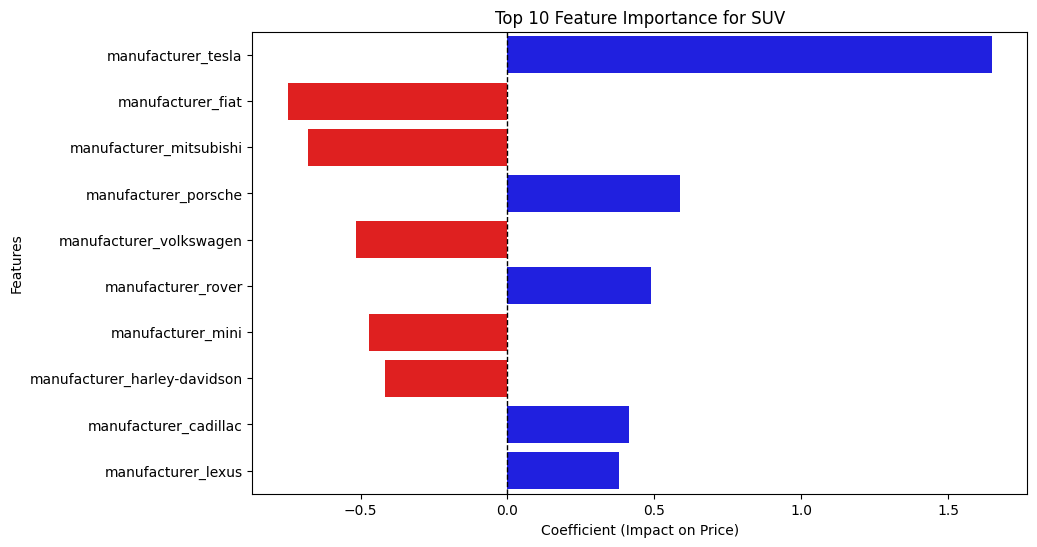


Feature Importance for bus:
                        Feature  Coefficient
18           manufacturer_honda    -0.920625
48                condition_new    -0.920625
41      manufacturer_volkswagen     0.772691
51                  fuel_diesel     0.735725
52                fuel_electric    -0.639355
82                     state_hi    -0.572283
28   manufacturer_mercedes-benz    -0.530148
46               condition_good     0.509114
74                     state_az     0.478065
118                    state_wa    -0.476023


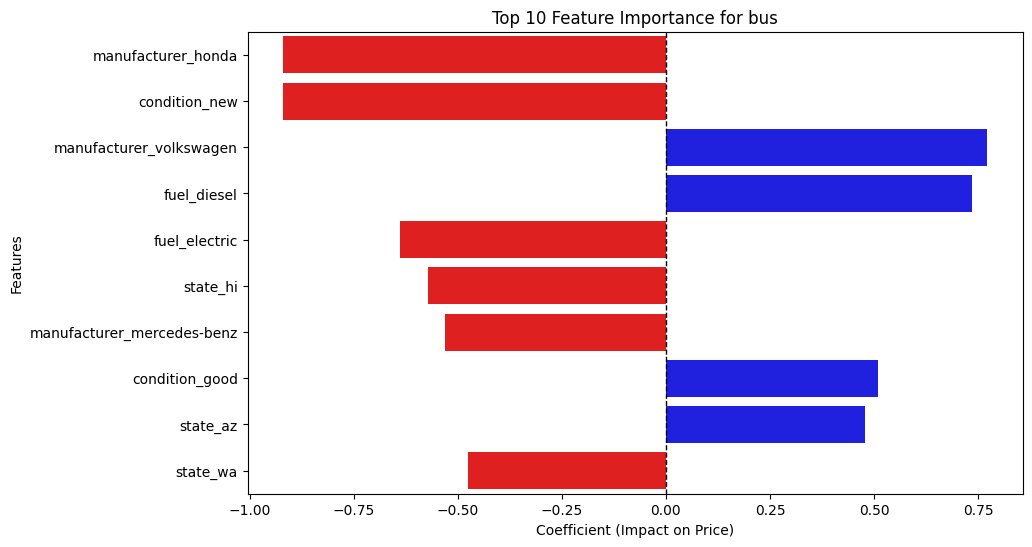


Feature Importance for convertible:
                      Feature  Coefficient
13       manufacturer_ferrari     6.438873
5   manufacturer_aston-martin     2.504389
12         manufacturer_dodge     1.756895
14          manufacturer_fiat    -1.477663
52              fuel_electric    -1.333539
8          manufacturer_buick    -1.195572
27         manufacturer_mazda    -1.038679
30          manufacturer_mini    -1.036719
48              condition_new     0.897121
22          manufacturer_jeep    -0.818937


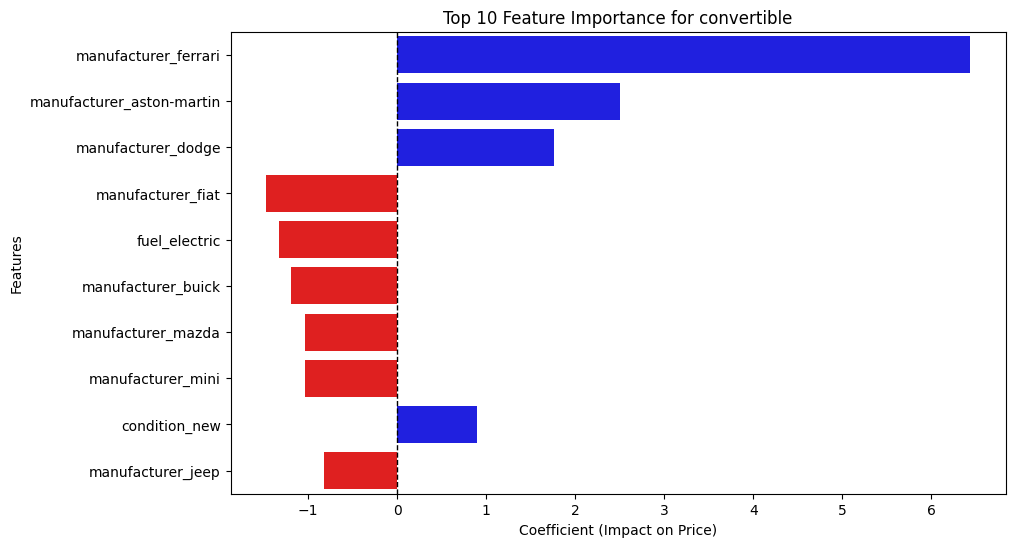


Feature Importance for coupe:
                  Feature  Coefficient
13   manufacturer_ferrari    11.373965
115              state_ut     1.637846
34   manufacturer_porsche     1.466228
14      manufacturer_fiat    -1.090129
23       manufacturer_kia    -1.051279
52          fuel_electric    -0.845876
19   manufacturer_hyundai    -0.839752
38    manufacturer_subaru    -0.783183
27     manufacturer_mazda    -0.762398
30      manufacturer_mini    -0.731668


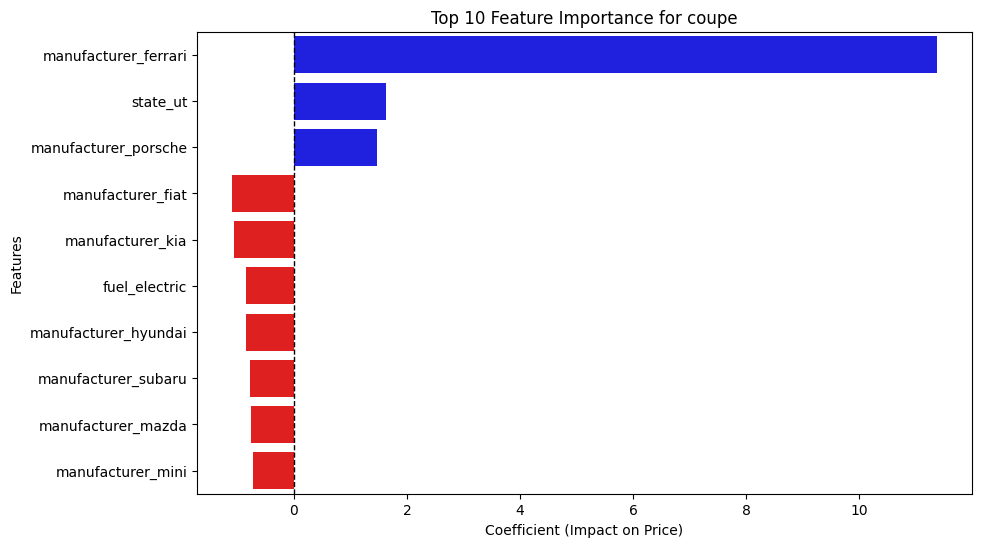


Feature Importance for hatchback:
                    Feature  Coefficient
34     manufacturer_porsche     1.806108
39       manufacturer_tesla     1.295486
6         manufacturer_audi     0.637760
31  manufacturer_mitsubishi    -0.496431
9     manufacturer_cadillac     0.453507
14        manufacturer_fiat    -0.438703
10   manufacturer_chevrolet    -0.437458
32      manufacturer_nissan    -0.386253
23         manufacturer_kia    -0.375779
16         manufacturer_gmc     0.363271


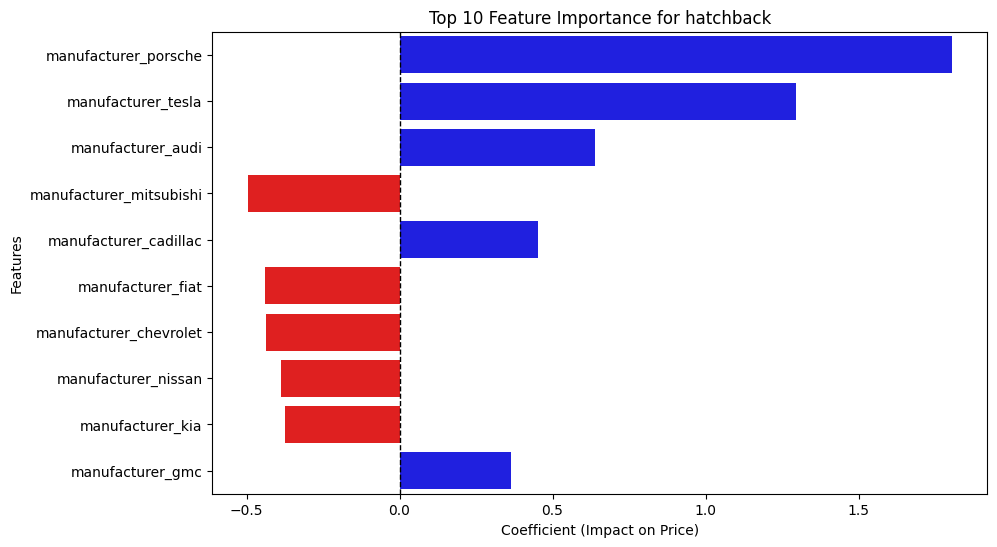


Feature Importance for mini-van:
                Feature  Coefficient
48        condition_new     1.150533
51          fuel_diesel     0.512444
71             state_ak     0.511620
1               car_age    -0.275581
46       condition_good    -0.249934
40  manufacturer_toyota     0.235590
58    title_status_lien     0.234662
45       condition_fair    -0.232718
55           fuel_other    -0.231925
44  condition_excellent    -0.207318


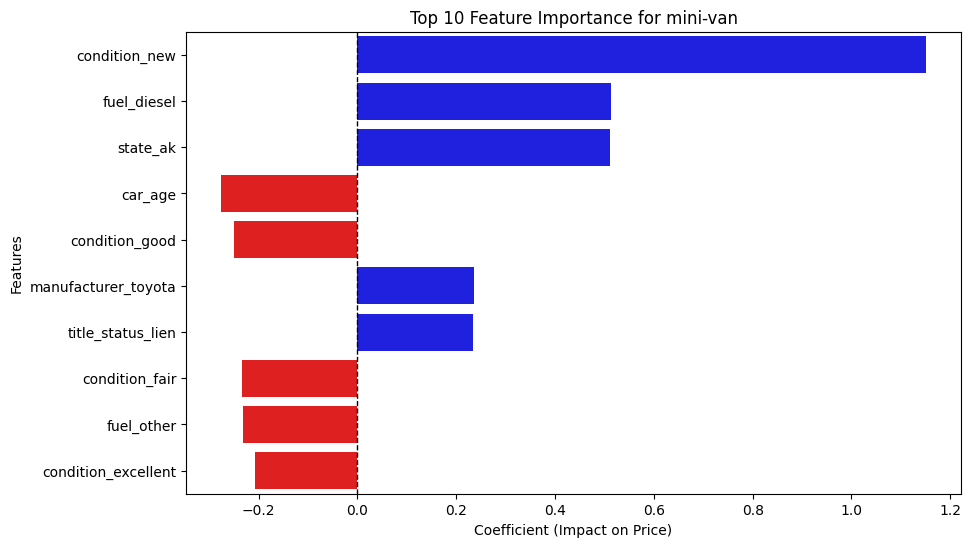


Feature Importance for offroad:
                     Feature  Coefficient
1                    car_age    -0.342413
40       manufacturer_toyota     0.270474
67                 drive_4wd     0.233536
41   manufacturer_volkswagen    -0.228946
35          manufacturer_ram     0.218535
2       manufacturer_Unknown    -0.205383
113                 state_tn     0.201250
22         manufacturer_jeep     0.187993
0                   odometer    -0.180940
76                  state_co     0.178629


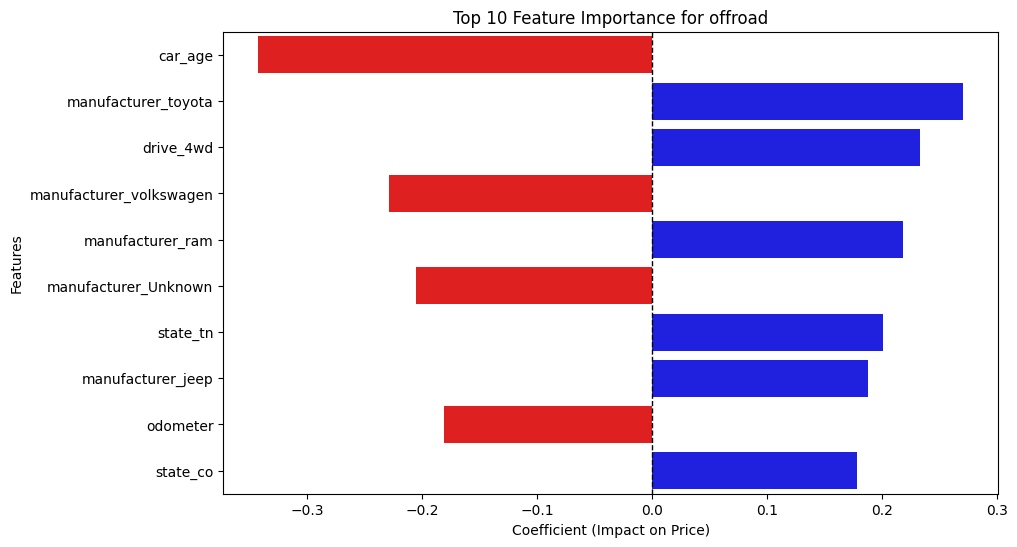


Feature Importance for other:
                         Feature  Coefficient
13          manufacturer_ferrari     3.396985
34          manufacturer_porsche     1.491399
97                      state_mt     1.421693
39            manufacturer_tesla     1.280365
17  manufacturer_harley-davidson    -1.113673
14             manufacturer_fiat    -0.964157
58             title_status_lien     0.915874
31       manufacturer_mitsubishi    -0.911940
52                 fuel_electric    -0.724774
48                 condition_new     0.722629


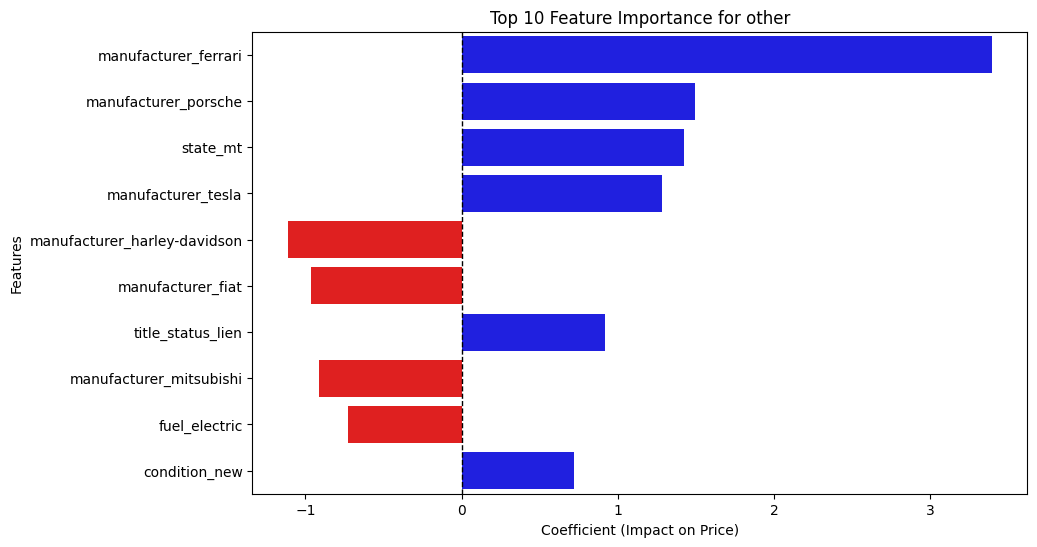


Feature Importance for pickup:
                          Feature  Coefficient
51                    fuel_diesel     0.702070
1                         car_age    -0.479869
17   manufacturer_harley-davidson     0.450901
2            manufacturer_Unknown     0.429914
62           title_status_salvage    -0.367480
108                      state_or     0.343791
32            manufacturer_nissan    -0.325786
0                        odometer    -0.308198
48                  condition_new     0.293649
67                      drive_4wd     0.289842


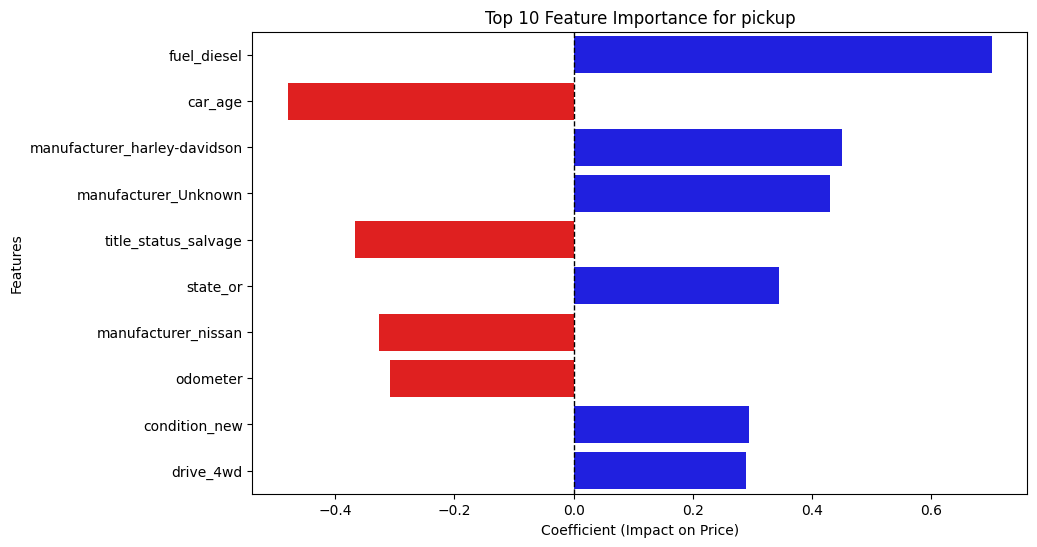


Feature Importance for sedan:
                         Feature  Coefficient
34          manufacturer_porsche     1.461473
5      manufacturer_aston-martin     1.145124
35              manufacturer_ram     0.763896
16              manufacturer_gmc     0.705526
39            manufacturer_tesla     0.604728
17  manufacturer_harley-davidson    -0.459392
14             manufacturer_fiat    -0.442979
19          manufacturer_hyundai    -0.371546
23              manufacturer_kia    -0.360554
15             manufacturer_ford    -0.356452


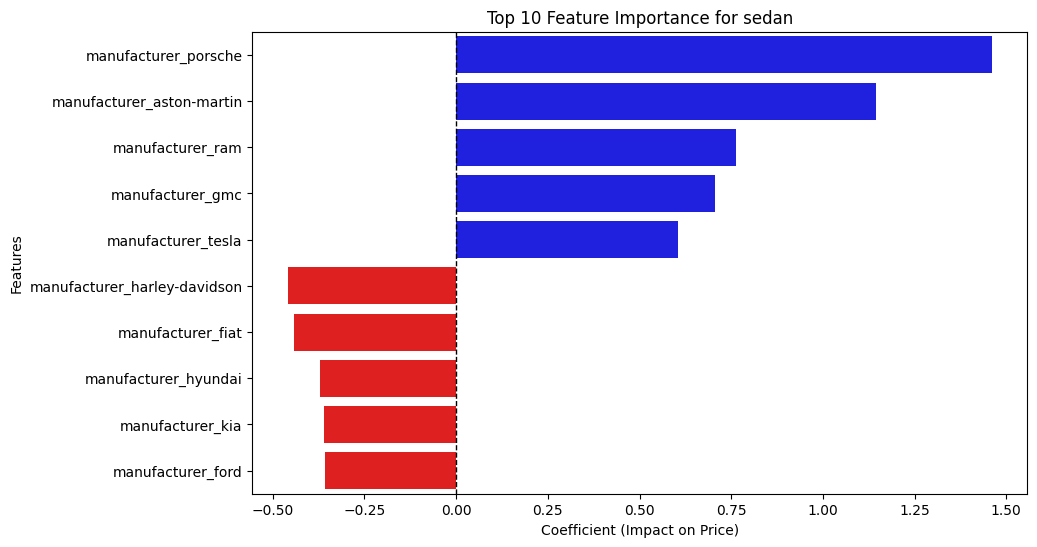


Feature Importance for truck:
                     Feature  Coefficient
51               fuel_diesel     0.821661
56      title_status_Unknown    -0.613061
1                    car_age    -0.463746
2       manufacturer_Unknown     0.380081
57        title_status_clean     0.357011
31   manufacturer_mitsubishi    -0.322656
0                   odometer    -0.320861
16          manufacturer_gmc     0.315570
118                 state_wa     0.276458
48             condition_new     0.252808


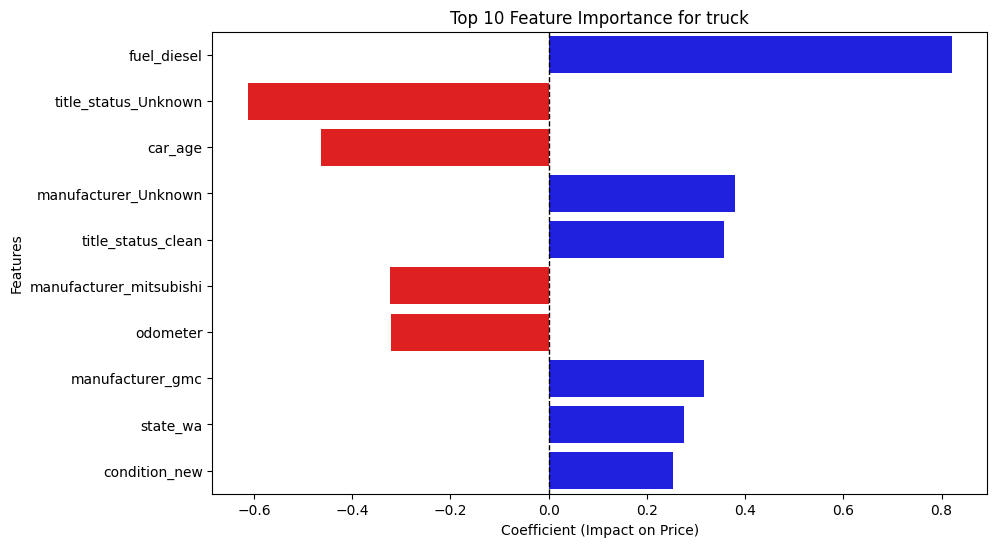


Feature Importance for van:
                     Feature  Coefficient
48             condition_new     1.792929
51               fuel_diesel     0.765382
30         manufacturer_mini     0.730001
62      title_status_salvage    -0.490087
115                 state_ut     0.482526
3         manufacturer_acura    -0.479560
22         manufacturer_jeep    -0.467802
41   manufacturer_volkswagen     0.465410
58         title_status_lien     0.415122
40       manufacturer_toyota     0.412559


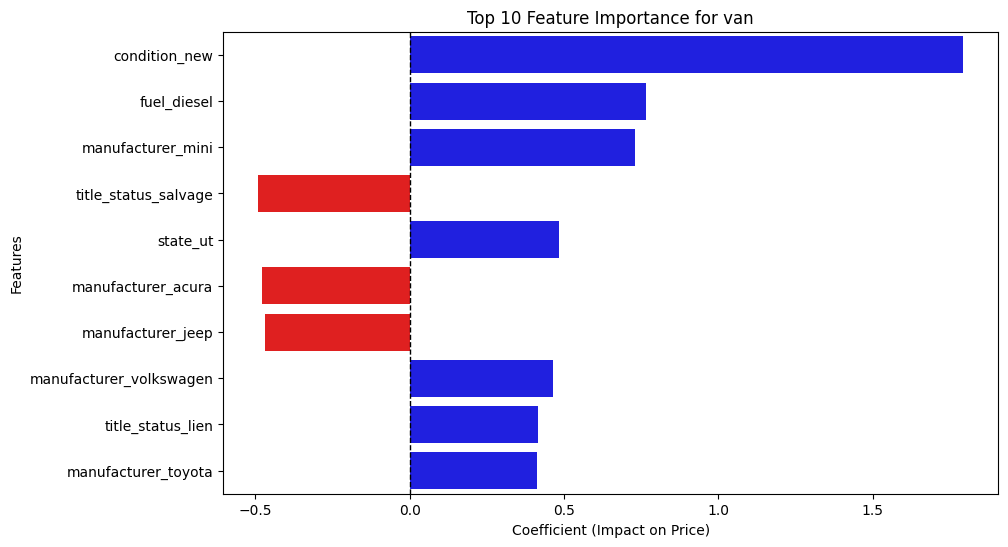


Feature Importance for wagon:
                       Feature  Coefficient
39          manufacturer_tesla     2.075243
36          manufacturer_rover     0.789440
14           manufacturer_fiat    -0.641010
59        title_status_missing    -0.560161
28  manufacturer_mercedes-benz     0.547785
23            manufacturer_kia    -0.478303
34        manufacturer_porsche     0.391486
31     manufacturer_mitsubishi    -0.389397
30           manufacturer_mini    -0.350608
1                      car_age    -0.313654


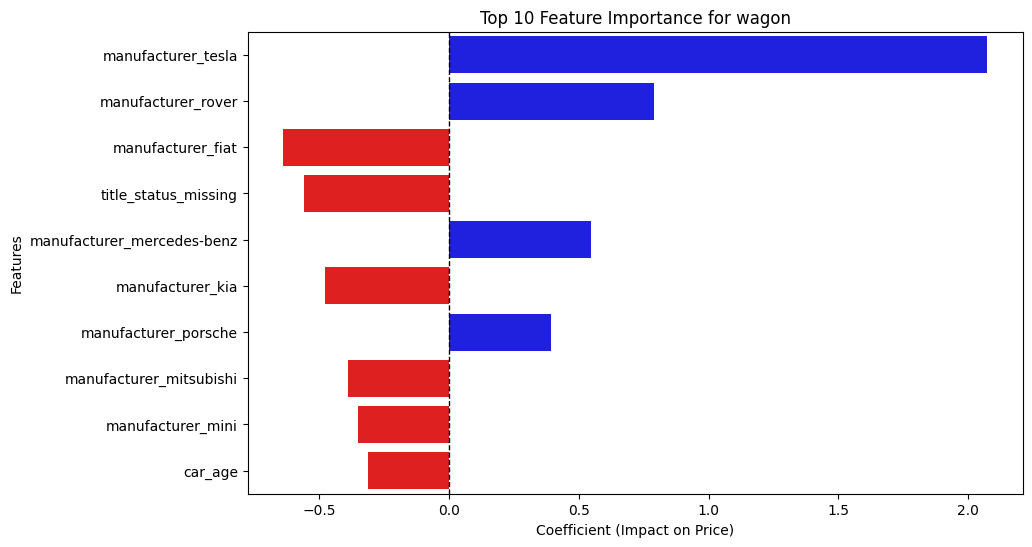

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each vehicle type's model stored in 'best_models'
for vehicle_type, model_info in best_models.items():
    model = model_info['Model']
    coefficients = model.coef_
    features = X_train.columns  # Ensure X_train columns haven't changed after model fitting
    
    # Create DataFrame to hold feature importance
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Coefficient': coefficients
    })
    
    # Sort features by absolute coefficient value but keep original sign
    feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

    # Select the top 10 most important features (positive or negative)
    feature_importance = feature_importance.head(10)

    # Print feature importance for this vehicle type
    print(f"\nFeature Importance for {vehicle_type}:")
    print(feature_importance)

    # Plotting with both positive and negative coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette=['red' if c < 0 else 'blue' for c in feature_importance['Coefficient']])
    plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at zero for reference
    plt.title(f'Top 10 Feature Importance for {vehicle_type}')
    plt.xlabel('Coefficient (Impact on Price)')
    plt.ylabel('Features')
    plt.show()


### Deployment

#### Summary of Feature Importance Across Vehicle Types

The analysis of feature importance provides significant insights into factors influencing vehicle pricing and characteristics by category. Here are the key findings for each vehicle type:


#### SUVs
SUVs: Seems like **Manufacturer** is the biggest influencer in this category.
Tesla, Porsche, and Land Rover models show positive coefficients, indicating a higher price or desirability, while Fiat and Mitsubishi are negatively associated with SUV pricing.
- **Positive Influences**: Tesla, Porsche, Land Rover
- **Negative Influences**: Fiat, Mitsubishi

#### Buses
- Seeing something strange here. New condition on busses seem to drive the prices lower. 
- Diesel busses preffered over Electric
- Honda and Mercedes not preffered in this category.
- Prices are really low in Hawai and Washington but higher in Arizona.
- **Positive Influences**: Volkswagen, Diesel fuel
- **Negative Influences**: Honda, New condition

#### Convertibles
- Ferrari, Aston Martin, Dodge and big drivers of prices. 
- Electric fuel is not preffered in this category
- **Positive Influences**: Ferrari, Aston Martin
- **Negative Influences**: Fiat, Electric fuel

#### Coupes
- Ferrari leads this sector.
- Seems like state of Utah has more demand for such vehicles.
- **Positive Influence**: Ferrari dominates the feature importance, suggesting a premium pricing effect.
- **Negative Influences**: Fiat, Electric fuel

#### Hatchbacks
- Manufacturer is biggest influencer here.
- **Positive Influences**: Porsche, Tesla
- **Negative Influences**: Mitsubishi, Fiat

#### Mini-vans
- In this category brand name is of less importance.
- New Condition and Diesel fuel drive prices up. Any condition lower than new significantly bring down the price.
- Prices in Alaska are high for Mini Vans
- **Positive Influences**: New condition, Diesel fuel
- **Negative Influences**: Good condition, Older car age

#### Offroad
- Older cars are not preffered in this category as indicated by Car_age and odometer negatively influencing the prices.
- Toyota and Jeep are top brands.
- Prices are higher in Tennesssee and Colorado
- four wheel drives are must
- **Positive Influences**: Toyota, Four-wheel drive
- **Negative Influences**: Age, Odometer

#### Other
- Ferrari and Porsche lead the market.
- **Positive Influences**: Ferrari, Tesla
- **Negative Influences**: Harley-Davidson, Fiat

#### Pickups
- Diesel is preffered.
- Price drop significantly for older vehicles.
- **Positive Influences**: Diesel fuel, Four-wheel drive
- **Negative Influences**: Salvage title status, Older vehicles

#### Sedans
- Manufacturer is the biggest factor. Porsche, Aston Martin and Ram are most expensive brands. Fiat, Hyundai, Harley ahve cheapest cars.
- **Positive Influences**: Porsche, Aston Martin, Ram
- **Negative Influences**: Hyundai, Kia

#### Trucks
- **Positive Influence**: Diesel fuel
- **Negative Influences**: Unknown title status, Mitsubishi

#### Vans
- **Positive Influences**: New condition, Diesel fuel
- **Negative Influences**: Salvage title, Jeep

#### Wagons
- **Positive Influence**: Tesla shows the highest positive influence.
- **Negative Influences**: Fiat, Missing title status

These insights can guide marketing strategies, pricing models, and inventory selections tailored to optimize for the factors most significantly impacting market value in each vehicle category.
